In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import astropy.units as u
from astropy.table import Table, Column

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 100
params = {'legend.fontsize': 'large',
          'figure.figsize': (5, 3.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large'}
pylab.rcParams.update(params)

from caterpillar import catalog

In [2]:
#colors
cmap = matplotlib.cm.get_cmap('plasma_r')
cw = cmap(0.75)
cn = cmap(0.25)
cd = 'blue'
cg = 'green'
alpha = 0.55

# Labels
la = 'Anomaly sample'
ln = 'Non-anomaly sample'
ld = r'$s_\mathrm{disc} > 3\sigma$ sample'
lg = r'$s_\mathrm{gen} > 3\sigma$ sample'
ld_dg = r'$s_\mathrm{disc} > 3\sigma$, $s_\mathrm{disc} > s_\mathrm{gen}$'
ld_gd = r'$s_\mathrm{disc} > 3\sigma$, $s_\mathrm{gen} > s_\mathrm{disc}$'
lg_dg = r'$s_\mathrm{gen} > 3\sigma$, $s_\mathrm{disc} > s_\mathrm{gen}$'
lg_gd = r'$s_\mathrm{gen} > 3\sigma$, $s_\mathrm{gen} > s_\mathrm{disc}$'

In [3]:
anom_file = '/scratch/ksf293/anomalies/data/hsc_catalogs/anomaly_catalog_hsc_full.fits'
anom_cat = Table.read(anom_file)

In [4]:
shape_types_to_add = ['i_sdss_shape', 'i_cmodel_exp_ellipse', 'i_cmodel_ellipse', 
                 'r_cmodel_exp_ellipse', 'r_cmodel_ellipse']
for shape_type in shape_types_to_add:
    anom_cat = catalog.moments_to_shape(anom_cat, shape_type=shape_type, update=True)

In [5]:
mask_disc = anom_cat['discriminator_score_normalized'] > 3
mask_gen = anom_cat['generator_score_normalized'] > 3
mask_dg = anom_cat['discriminator_score_normalized'] > anom_cat['generator_score_normalized']
mask_gd = anom_cat['discriminator_score_normalized'] <= anom_cat['generator_score_normalized']

anom_gen = anom_cat[mask_gen]
anom_disc = anom_cat[mask_disc]
anom_weird = anom_cat[mask_disc & mask_dg] #the combination used in the paper
anom_norm = anom_cat[~(mask_disc & mask_dg)]
anom_disc_dg = anom_cat[mask_disc & mask_dg]
anom_disc_gd = anom_cat[mask_disc & mask_gd]
anom_gen_dg = anom_cat[mask_gen & mask_dg]
anom_gen_gd = anom_cat[mask_gen & mask_gd]

In [6]:
print(len(anom_cat))
print(len(anom_weird))
print(len(anom_disc))
print(len(anom_gen))

942781
11893
13477
11528


<ipython-input-7-f46724032e9c>:1: RuntimeWarning: divide by zero encountered in true_divide
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-7-f46724032e9c>:1: RuntimeWarning: invalid value encountered in true_divide
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-7-f46724032e9c>:1: RuntimeWarning: divide by zero encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-7-f46724032e9c>:1: RuntimeWarning: invalid value encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-7-f46724032e9c>:2: RuntimeWarning: divide by zero encountered in true_divide
  gr_cmod_weird = (-2.5 * np.log10(anom_weird['g_cmodel_flux']/ anom_weird['r_cmodel_flux']))
<ipython-input-7-f46724032e9c>:2: RuntimeWarning: invalid value encountered in true_divide
  gr_cmod_weird = (-2.5 *

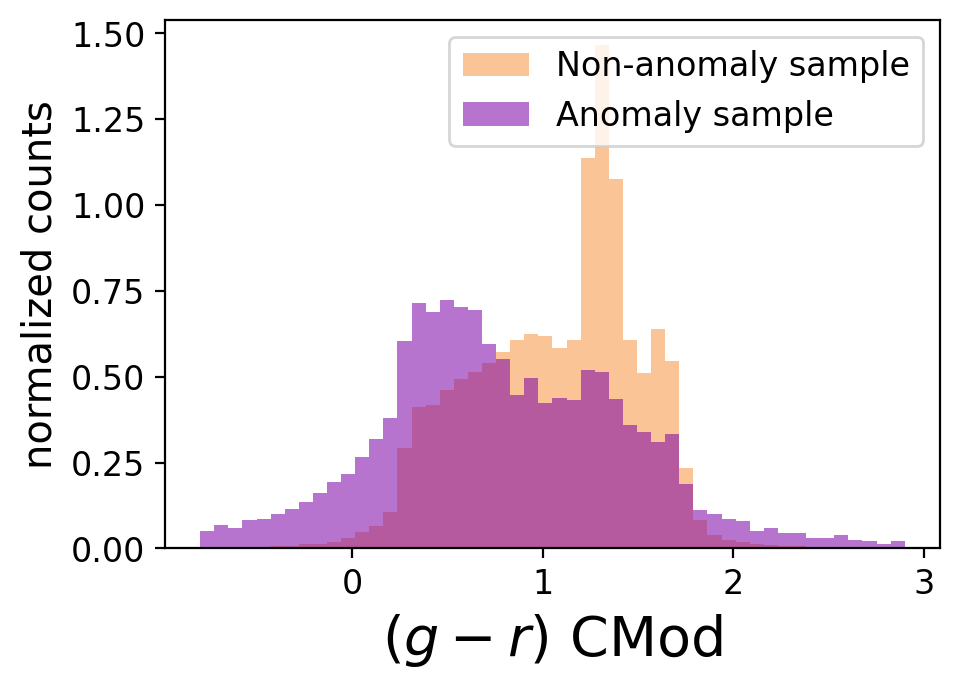

In [7]:
gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
gr_cmod_weird = (-2.5 * np.log10(anom_weird['g_cmodel_flux']/ anom_weird['r_cmodel_flux']))

plt.figure()
_ = plt.hist(gr_cmod, bins=50, density=True, range=(-0.8, 2.9), color=cn, label=ln, alpha=alpha)
_ = plt.hist(gr_cmod_weird, bins=50, density=True, range=(-0.8, 2.9), color=cw, label=la, alpha=alpha)
plt.xlabel(r'$(g-r)\ \rm CMod$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-8-e0a460999f0a>:1: RuntimeWarning: divide by zero encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['r_cmodel_flux']/ anom_norm['i_cmodel_flux']))
<ipython-input-8-e0a460999f0a>:1: RuntimeWarning: invalid value encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['r_cmodel_flux']/ anom_norm['i_cmodel_flux']))
<ipython-input-8-e0a460999f0a>:2: RuntimeWarning: divide by zero encountered in log10
  gr_cmod_weird = (-2.5 * np.log10(anom_weird['r_cmodel_flux']/ anom_weird['i_cmodel_flux']))
<ipython-input-8-e0a460999f0a>:2: RuntimeWarning: invalid value encountered in log10
  gr_cmod_weird = (-2.5 * np.log10(anom_weird['r_cmodel_flux']/ anom_weird['i_cmodel_flux']))


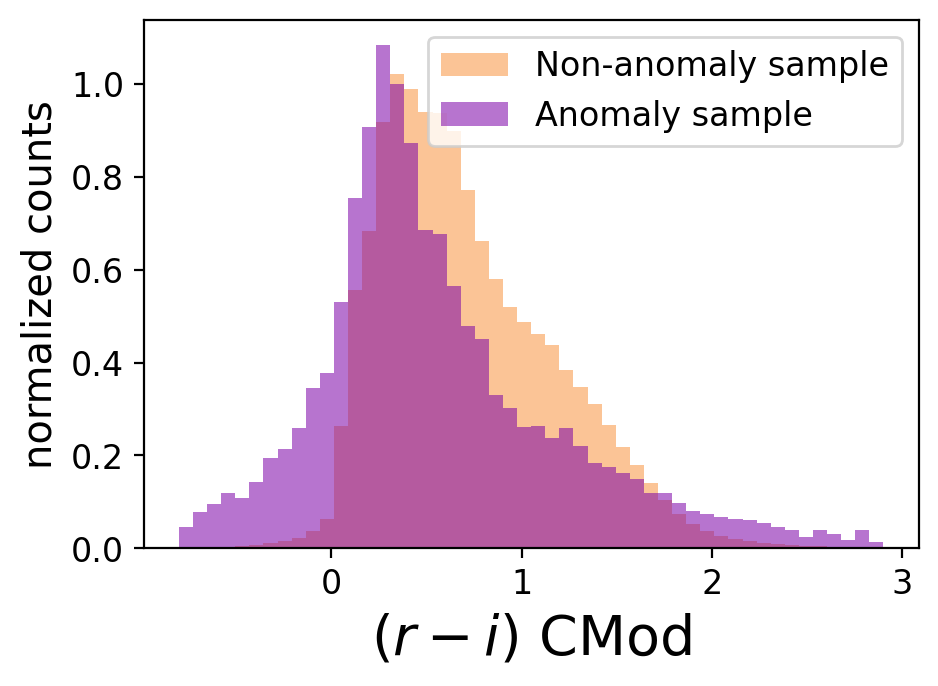

In [8]:
gr_cmod = (-2.5 * np.log10(anom_norm['r_cmodel_flux']/ anom_norm['i_cmodel_flux']))
gr_cmod_weird = (-2.5 * np.log10(anom_weird['r_cmodel_flux']/ anom_weird['i_cmodel_flux']))

_ = plt.hist(gr_cmod, bins=50, density=True, range=(-0.8, 2.9), color=cn, label=ln, alpha=alpha)
_ = plt.hist(gr_cmod_weird, bins=50, density=True, range=(-0.8, 2.9), color=cw, label=la, alpha=alpha)
plt.xlabel(r'$(r-i)\ \rm CMod$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-9-d10c1e7f7e88>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio = np.log10(anom_norm['i_convolvedflux_3_20_flux'] / anom_norm['i_cmodel_flux'])
<ipython-input-9-d10c1e7f7e88>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_w = np.log10(anom_weird['i_convolvedflux_3_20_flux'] / anom_weird['i_cmodel_flux'])


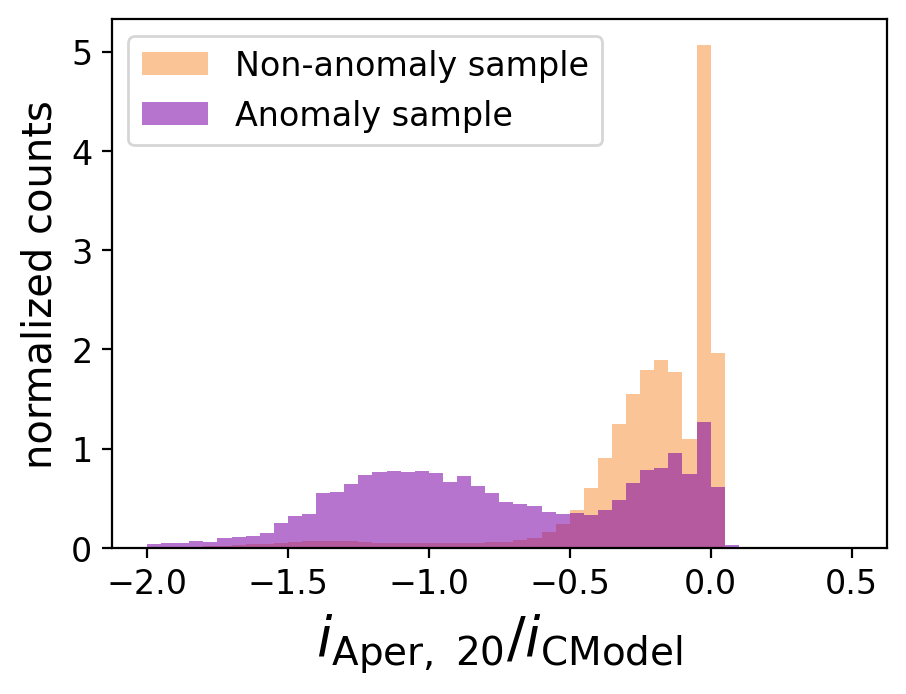

In [9]:
aper_ratio = np.log10(anom_norm['i_convolvedflux_3_20_flux'] / anom_norm['i_cmodel_flux'])
aper_ratio_w = np.log10(anom_weird['i_convolvedflux_3_20_flux'] / anom_weird['i_cmodel_flux'])

_ = plt.hist(aper_ratio, bins=50, density=True, range=(-2, 0.5), color=cn, label=ln, alpha=alpha)
_ = plt.hist(aper_ratio_w, bins=50, density=True, range=(-2, 0.5), color=cw, label=la, alpha=alpha)
_ = plt.xlabel(r'$i_{\rm Aper,\ 20}/i_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-10-62edd07c480a>:1: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio = np.log10(anom_norm['r_convolvedflux_3_20_flux'] / anom_norm['r_cmodel_flux'])
<ipython-input-10-62edd07c480a>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio = np.log10(anom_norm['r_convolvedflux_3_20_flux'] / anom_norm['r_cmodel_flux'])
<ipython-input-10-62edd07c480a>:2: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_w = np.log10(anom_weird['r_convolvedflux_3_20_flux'] / anom_weird['r_cmodel_flux'])
<ipython-input-10-62edd07c480a>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_w = np.log10(anom_weird['r_convolvedflux_3_20_flux'] / anom_weird['r_cmodel_flux'])


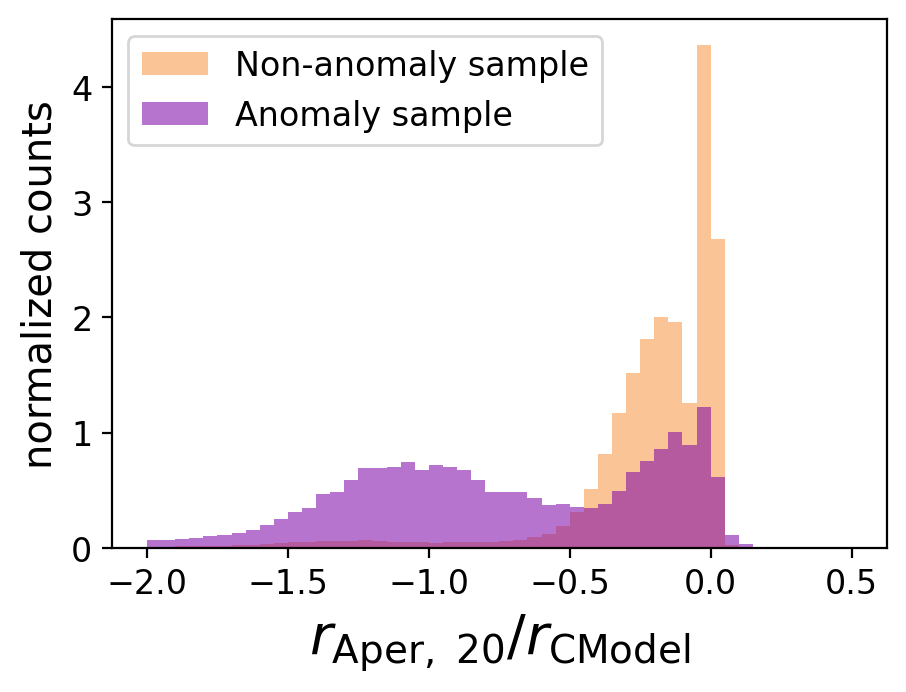

In [10]:
aper_ratio = np.log10(anom_norm['r_convolvedflux_3_20_flux'] / anom_norm['r_cmodel_flux'])
aper_ratio_w = np.log10(anom_weird['r_convolvedflux_3_20_flux'] / anom_weird['r_cmodel_flux'])

_ = plt.hist(aper_ratio, bins=50, density=True, range=(-2, 0.5), color=cn, label=ln, alpha=alpha)
_ = plt.hist(aper_ratio_w, bins=50, density=True, range=(-2, 0.5), color=cw, label=la, alpha=alpha)

_ = plt.xlabel(r'$r_{\rm Aper,\ 20}/r_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

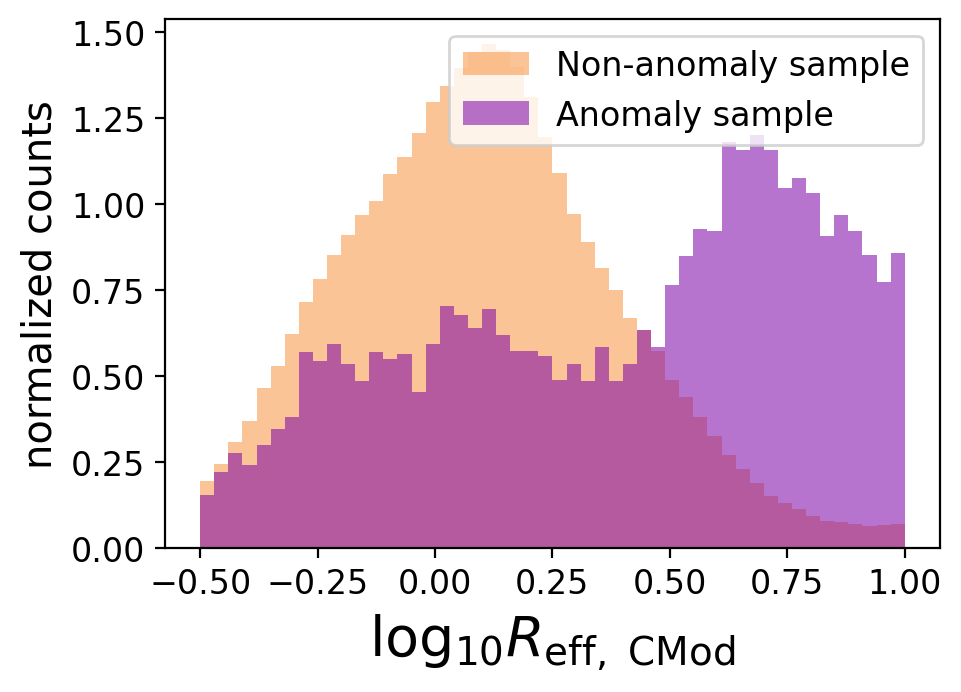

In [11]:
logr = np.log10(anom_norm['i_cmodel_ellipse_r'])
logr_weird = np.log10(anom_weird['i_cmodel_ellipse_r'])

_ = plt.hist(logr, bins=50, density=True, range=(-0.5, 1.0), color=cn, label=ln, alpha=alpha)
_ = plt.hist(logr_weird, bins=50, density=True, range=(-0.5, 1.0), color=cw, label=la, alpha=alpha)
_ = plt.xlabel(r'$\log_{10} R_{\rm eff,\ CMod}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

Let's compare the high-discriminator-score and high-generator-score samples:

<ipython-input-12-d413571b6b09>:1: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_d = np.log10(anom_disc['r_convolvedflux_3_20_flux'] / anom_disc['r_cmodel_flux'])
<ipython-input-12-d413571b6b09>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio_d = np.log10(anom_disc['r_convolvedflux_3_20_flux'] / anom_disc['r_cmodel_flux'])
<ipython-input-12-d413571b6b09>:2: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_g = np.log10(anom_gen['r_convolvedflux_3_20_flux'] / anom_gen['r_cmodel_flux'])
<ipython-input-12-d413571b6b09>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_g = np.log10(anom_gen['r_convolvedflux_3_20_flux'] / anom_gen['r_cmodel_flux'])


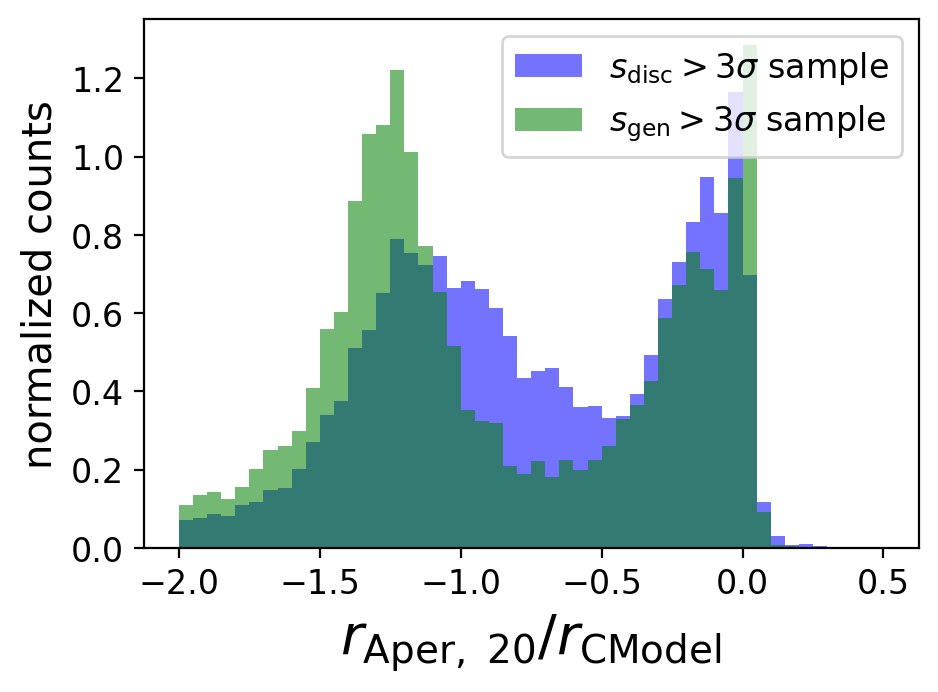

In [12]:
aper_ratio_d = np.log10(anom_disc['r_convolvedflux_3_20_flux'] / anom_disc['r_cmodel_flux'])
aper_ratio_g = np.log10(anom_gen['r_convolvedflux_3_20_flux'] / anom_gen['r_cmodel_flux'])

_ = plt.hist(aper_ratio_d, bins=50, density=True, range=(-2, 0.5), color=cd, label=ld, alpha=alpha)
_ = plt.hist(aper_ratio_g, bins=50, density=True, range=(-2, 0.5), color=cg, label=lg, alpha=alpha)

_ = plt.xlabel(r'$r_{\rm Aper,\ 20}/r_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-13-22296501de58>:1: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_d_dg = np.log10(anom_disc_dg['r_convolvedflux_3_20_flux'] / anom_disc_dg['r_cmodel_flux'])
<ipython-input-13-22296501de58>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio_d_dg = np.log10(anom_disc_dg['r_convolvedflux_3_20_flux'] / anom_disc_dg['r_cmodel_flux'])
<ipython-input-13-22296501de58>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_d_gd = np.log10(anom_disc_gd['r_convolvedflux_3_20_flux'] / anom_disc_gd['r_cmodel_flux'])
<ipython-input-13-22296501de58>:3: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_g_dg = np.log10(anom_gen_dg['r_convolvedflux_3_20_flux'] / anom_gen_dg['r_cmodel_flux'])
<ipython-input-13-22296501de58>:3: RuntimeWarning: invalid value encountered in log10
  aper_ratio_g_dg = np.log10(anom_gen_dg['r_convolvedflux_3_20_flux'] / anom_gen_dg['r_cmodel_flux'])
<ipython-input-13-22296501de58>:4: Runti

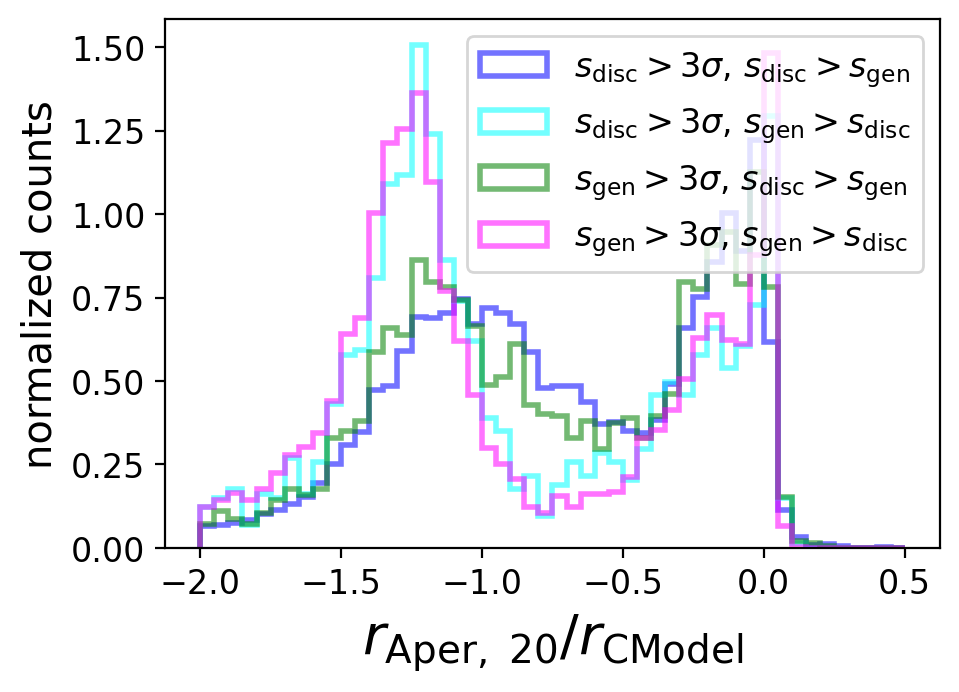

In [13]:
aper_ratio_d_dg = np.log10(anom_disc_dg['r_convolvedflux_3_20_flux'] / anom_disc_dg['r_cmodel_flux'])
aper_ratio_d_gd = np.log10(anom_disc_gd['r_convolvedflux_3_20_flux'] / anom_disc_gd['r_cmodel_flux'])
aper_ratio_g_dg = np.log10(anom_gen_dg['r_convolvedflux_3_20_flux'] / anom_gen_dg['r_cmodel_flux'])
aper_ratio_g_gd = np.log10(anom_gen_gd['r_convolvedflux_3_20_flux'] / anom_gen_gd['r_cmodel_flux'])

histtype='step'
lw=2
_ = plt.hist(aper_ratio_d_dg, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color=cd, label=ld_dg, alpha=alpha)
_ = plt.hist(aper_ratio_d_gd, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color='cyan', label=ld_gd, alpha=alpha)
_ = plt.hist(aper_ratio_g_dg, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color=cg, label=lg_dg, alpha=alpha)
_ = plt.hist(aper_ratio_g_gd, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color='magenta', label=lg_gd, alpha=alpha)

_ = plt.xlabel(r'$r_{\rm Aper,\ 20}/r_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

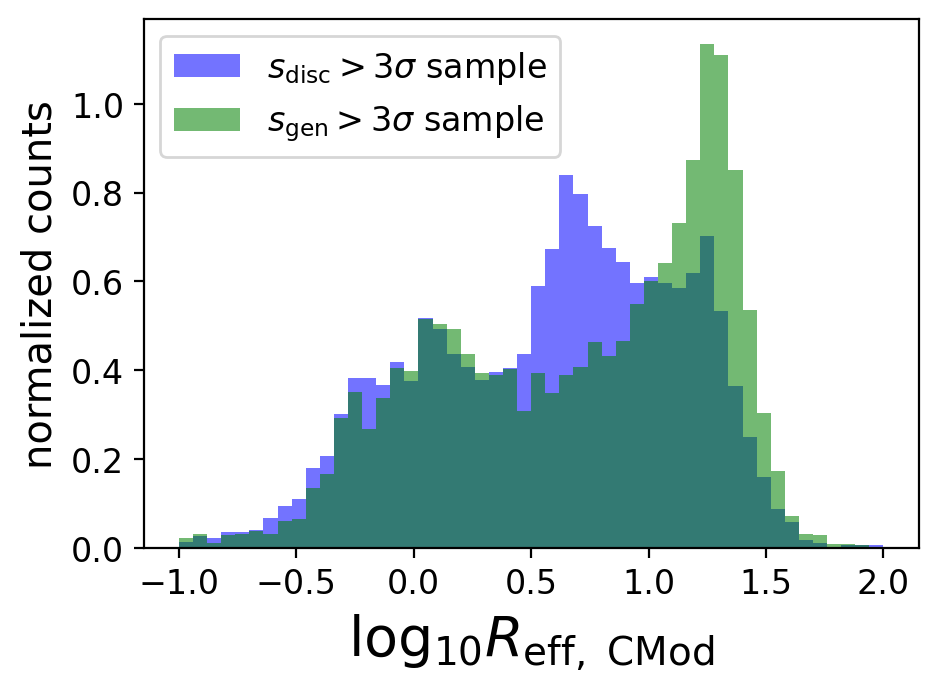

In [14]:
logr_disc = np.log10(anom_disc['i_cmodel_ellipse_r'])
logr_gen = np.log10(anom_gen['i_cmodel_ellipse_r'])

myrange = (-1, 2)
_ = plt.hist(logr_disc, bins=50, density=True, range=myrange, color=cd, label=ld, alpha=alpha)
_ = plt.hist(logr_gen, bins=50, density=True, range=myrange, color=cg, label=lg, alpha=alpha)
_ = plt.xlabel(r'$\log_{10} R_{\rm eff,\ CMod}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

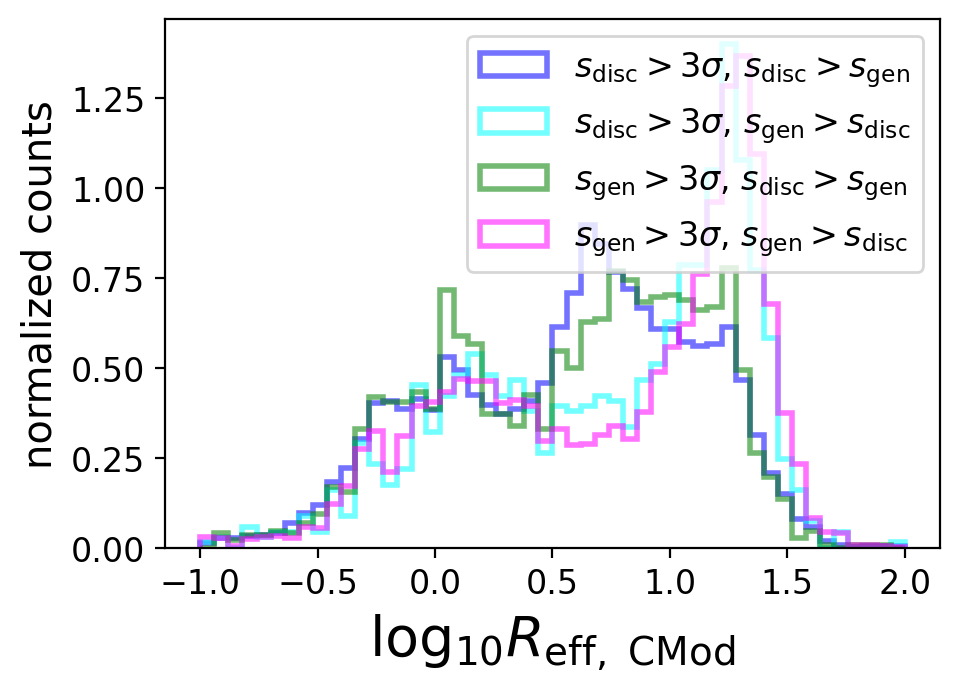

In [15]:
logr_d_dg = np.log10(anom_disc_dg['i_cmodel_ellipse_r'])
logr_d_gd = np.log10(anom_disc_gd['i_cmodel_ellipse_r'])
logr_g_dg = np.log10(anom_gen_dg['i_cmodel_ellipse_r'])
logr_g_gd = np.log10(anom_gen_gd['i_cmodel_ellipse_r'])

myrange = (-1, 2)
histtype='step'
lw=2
_ = plt.hist(logr_d_dg, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color=cd, label=ld_dg, alpha=alpha)
_ = plt.hist(logr_d_gd, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color='cyan', label=ld_gd, alpha=alpha)
_ = plt.hist(logr_g_dg, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color=cg, label=lg_dg, alpha=alpha)
_ = plt.hist(logr_g_gd, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color='magenta', label=lg_gd, alpha=alpha)

_ = plt.xlabel(r'$\log_{10} R_{\rm eff,\ CMod}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

These scores are picking out very different populations! 

### Now let's do the same analysis but with cuts on the bright star mask and compact objects

In [16]:
anom_file = '/scratch/ksf293/anomalies/data/hsc_catalogs/anomaly_catalog_hsc_gal.fits'
anom_cat = Table.read(anom_file)

In [17]:
mask_disc = anom_cat['discriminator_score_normalized'] > 3
mask_gen = anom_cat['generator_score_normalized'] > 3
mask_dg = anom_cat['discriminator_score_normalized'] > anom_cat['generator_score_normalized']

anom_gen = anom_cat[mask_gen]
anom_disc = anom_cat[mask_disc]
anom_weird = anom_cat[mask_disc & mask_dg] #the combination used in the paper
anom_norm = anom_cat[~(mask_disc & mask_dg)]

print(len(anom_cat))
print(len(anom_weird))
print(len(anom_disc))
print(len(anom_gen))

542384
5968
6083
1739


<ipython-input-18-2dd5b3b3ac5f>:1: RuntimeWarning: divide by zero encountered in true_divide
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-18-2dd5b3b3ac5f>:1: RuntimeWarning: invalid value encountered in true_divide
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-18-2dd5b3b3ac5f>:1: RuntimeWarning: divide by zero encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-18-2dd5b3b3ac5f>:1: RuntimeWarning: invalid value encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
<ipython-input-18-2dd5b3b3ac5f>:2: RuntimeWarning: divide by zero encountered in true_divide
  gr_cmod_weird = (-2.5 * np.log10(anom_weird['g_cmodel_flux']/ anom_weird['r_cmodel_flux']))
<ipython-input-18-2dd5b3b3ac5f>:2: RuntimeWarning: invalid value encountered in true_divide
  gr_cmod_weird = (

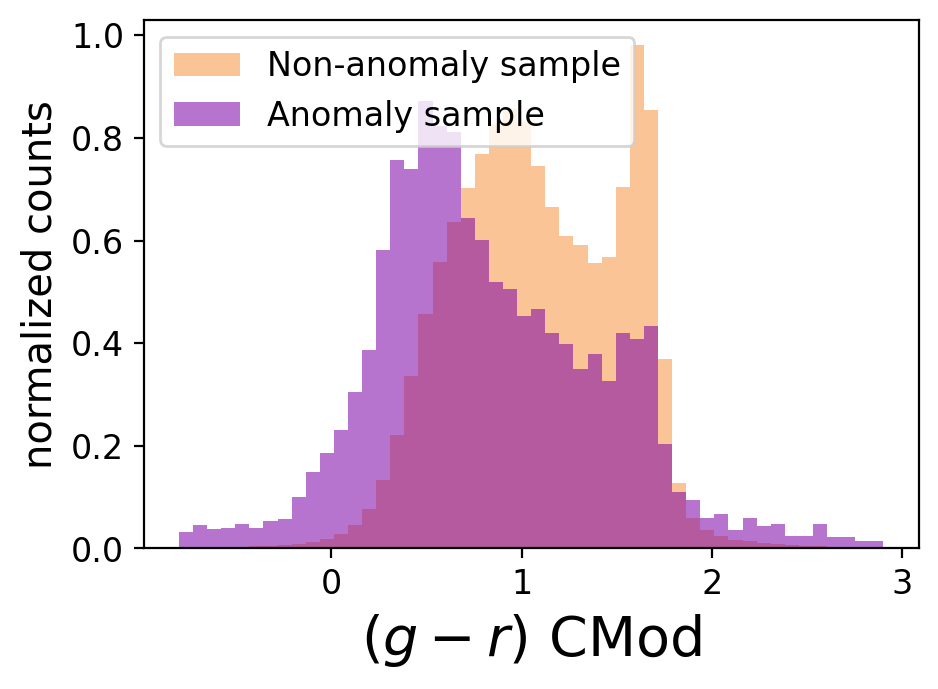

In [18]:
gr_cmod = (-2.5 * np.log10(anom_norm['g_cmodel_flux']/ anom_norm['r_cmodel_flux']))
gr_cmod_weird = (-2.5 * np.log10(anom_weird['g_cmodel_flux']/ anom_weird['r_cmodel_flux']))

_ = plt.hist(gr_cmod, bins=50, density=True, range=(-0.8, 2.9), color=cn, label=ln, alpha=alpha)
_ = plt.hist(gr_cmod_weird, bins=50, density=True, range=(-0.8, 2.9), color=cw, label=la, alpha=alpha)
plt.xlabel(r'$(g-r)\ \rm CMod$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-19-e0a460999f0a>:1: RuntimeWarning: divide by zero encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['r_cmodel_flux']/ anom_norm['i_cmodel_flux']))
<ipython-input-19-e0a460999f0a>:1: RuntimeWarning: invalid value encountered in log10
  gr_cmod = (-2.5 * np.log10(anom_norm['r_cmodel_flux']/ anom_norm['i_cmodel_flux']))
<ipython-input-19-e0a460999f0a>:2: RuntimeWarning: divide by zero encountered in log10
  gr_cmod_weird = (-2.5 * np.log10(anom_weird['r_cmodel_flux']/ anom_weird['i_cmodel_flux']))
<ipython-input-19-e0a460999f0a>:2: RuntimeWarning: invalid value encountered in log10
  gr_cmod_weird = (-2.5 * np.log10(anom_weird['r_cmodel_flux']/ anom_weird['i_cmodel_flux']))


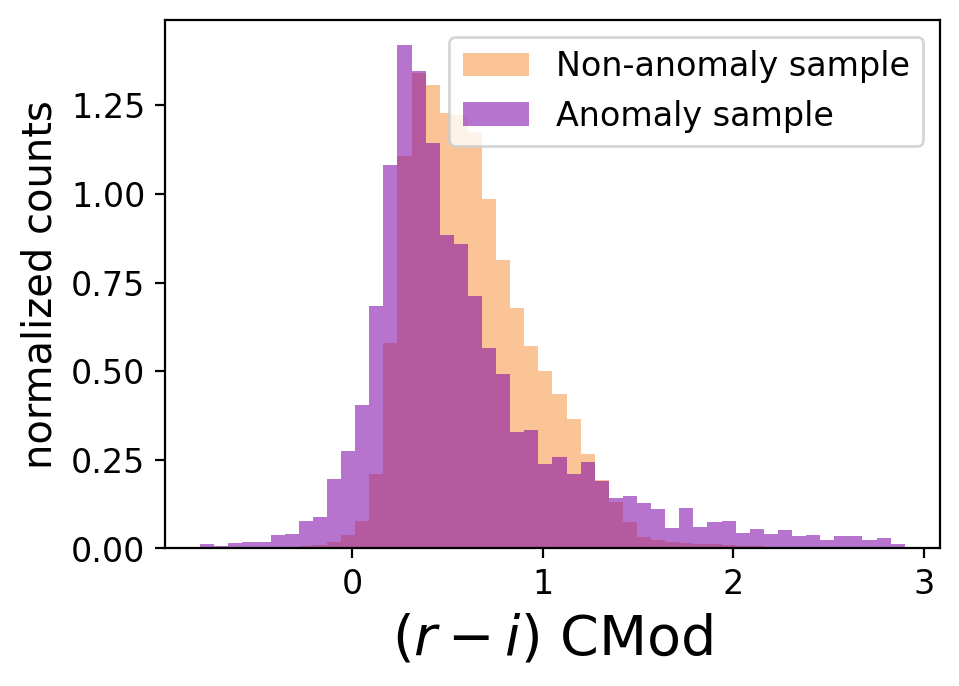

In [19]:
gr_cmod = (-2.5 * np.log10(anom_norm['r_cmodel_flux']/ anom_norm['i_cmodel_flux']))
gr_cmod_weird = (-2.5 * np.log10(anom_weird['r_cmodel_flux']/ anom_weird['i_cmodel_flux']))

_ = plt.hist(gr_cmod, bins=50, density=True, range=(-0.8, 2.9), color=cn, label=ln, alpha=alpha)
_ = plt.hist(gr_cmod_weird, bins=50, density=True, range=(-0.8, 2.9), color=cw, label=la, alpha=alpha)
plt.xlabel(r'$(r-i)\ \rm CMod$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-20-d10c1e7f7e88>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio = np.log10(anom_norm['i_convolvedflux_3_20_flux'] / anom_norm['i_cmodel_flux'])
<ipython-input-20-d10c1e7f7e88>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_w = np.log10(anom_weird['i_convolvedflux_3_20_flux'] / anom_weird['i_cmodel_flux'])


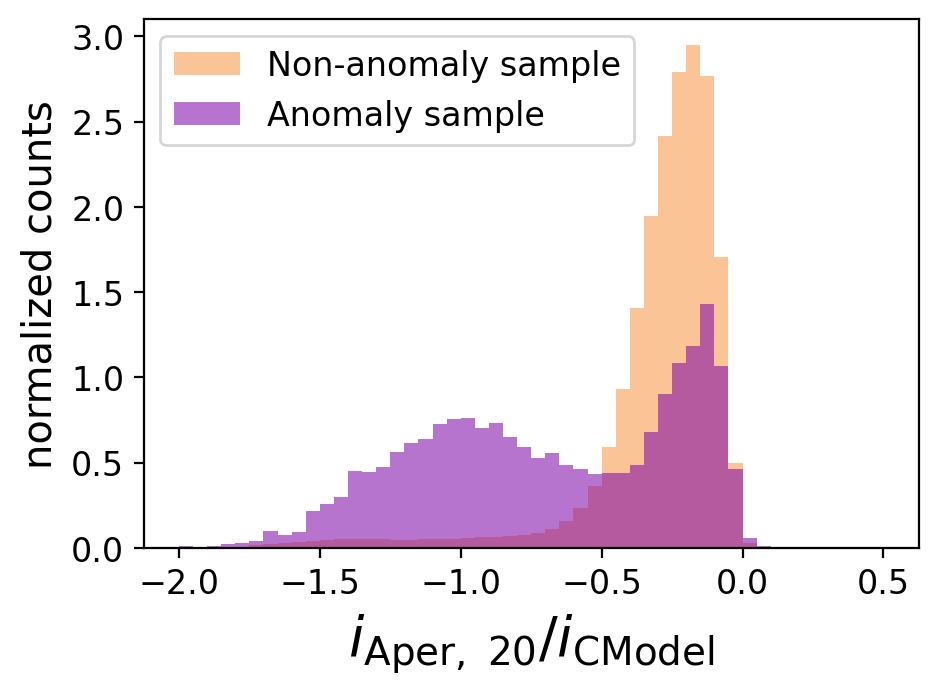

In [20]:
aper_ratio = np.log10(anom_norm['i_convolvedflux_3_20_flux'] / anom_norm['i_cmodel_flux'])
aper_ratio_w = np.log10(anom_weird['i_convolvedflux_3_20_flux'] / anom_weird['i_cmodel_flux'])

_ = plt.hist(aper_ratio, bins=50, density=True, range=(-2, 0.5), color=cn, label=ln, alpha=alpha)
_ = plt.hist(aper_ratio_w, bins=50, density=True, range=(-2, 0.5), color=cw, label=la, alpha=alpha)
_ = plt.xlabel(r'$i_{\rm Aper,\ 20}/i_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-21-62edd07c480a>:1: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio = np.log10(anom_norm['r_convolvedflux_3_20_flux'] / anom_norm['r_cmodel_flux'])
<ipython-input-21-62edd07c480a>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio = np.log10(anom_norm['r_convolvedflux_3_20_flux'] / anom_norm['r_cmodel_flux'])
<ipython-input-21-62edd07c480a>:2: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_w = np.log10(anom_weird['r_convolvedflux_3_20_flux'] / anom_weird['r_cmodel_flux'])
<ipython-input-21-62edd07c480a>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_w = np.log10(anom_weird['r_convolvedflux_3_20_flux'] / anom_weird['r_cmodel_flux'])


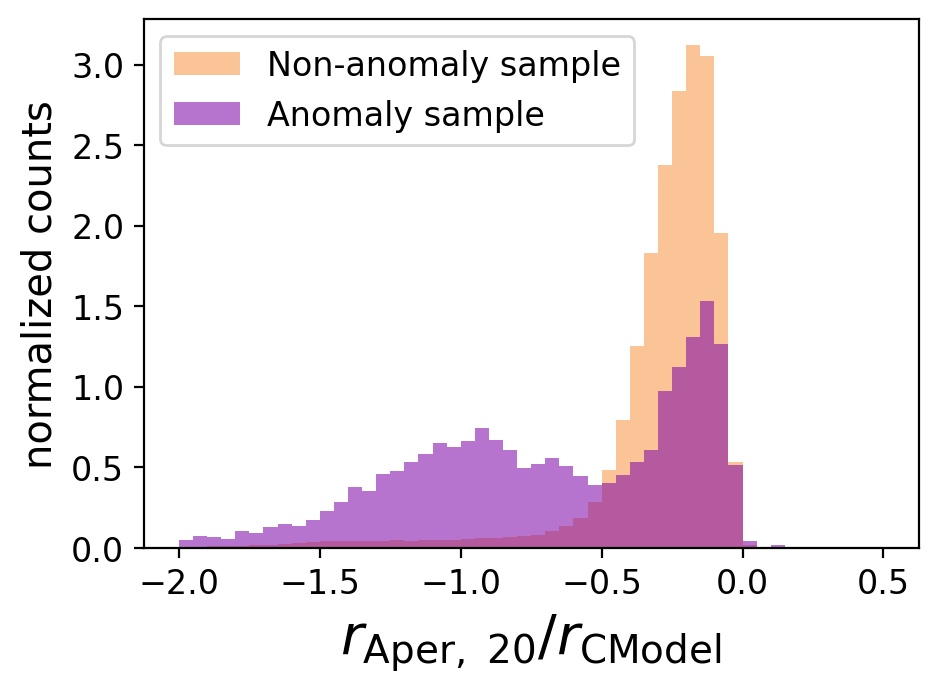

In [21]:
aper_ratio = np.log10(anom_norm['r_convolvedflux_3_20_flux'] / anom_norm['r_cmodel_flux'])
aper_ratio_w = np.log10(anom_weird['r_convolvedflux_3_20_flux'] / anom_weird['r_cmodel_flux'])

_ = plt.hist(aper_ratio, bins=50, density=True, range=(-2, 0.5), color=cn, label=ln, alpha=alpha)
_ = plt.hist(aper_ratio_w, bins=50, density=True, range=(-2, 0.5), color=cw, label=la, alpha=alpha)

_ = plt.xlabel(r'$r_{\rm Aper,\ 20}/r_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

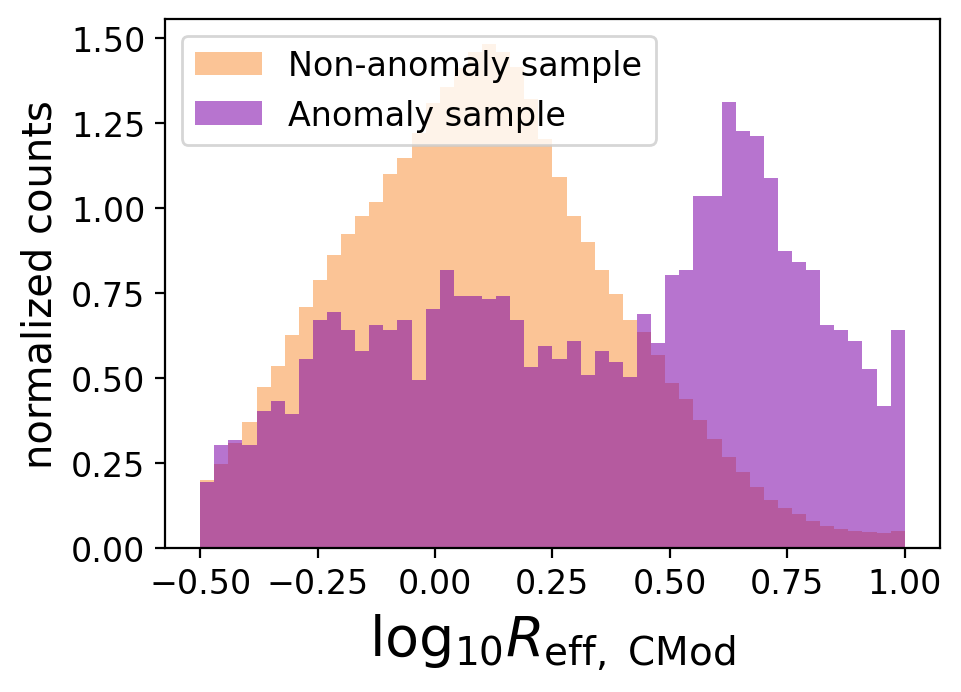

In [22]:
logr = np.log10(anom_norm['i_cmodel_ellipse_r'])
logr_weird = np.log10(anom_weird['i_cmodel_ellipse_r'])

_ = plt.hist(logr, bins=50, density=True, range=(-0.5, 1.0), color=cn, label=ln, alpha=alpha)
_ = plt.hist(logr_weird, bins=50, density=True, range=(-0.5, 1.0), color=cw, label=la, alpha=alpha)
_ = plt.xlabel(r'$\log_{10} R_{\rm eff,\ CMod}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

Let's compare the high-discriminator-score and high-generator-score samples:

<ipython-input-23-d413571b6b09>:1: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_d = np.log10(anom_disc['r_convolvedflux_3_20_flux'] / anom_disc['r_cmodel_flux'])
<ipython-input-23-d413571b6b09>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio_d = np.log10(anom_disc['r_convolvedflux_3_20_flux'] / anom_disc['r_cmodel_flux'])
<ipython-input-23-d413571b6b09>:2: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_g = np.log10(anom_gen['r_convolvedflux_3_20_flux'] / anom_gen['r_cmodel_flux'])
<ipython-input-23-d413571b6b09>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_g = np.log10(anom_gen['r_convolvedflux_3_20_flux'] / anom_gen['r_cmodel_flux'])


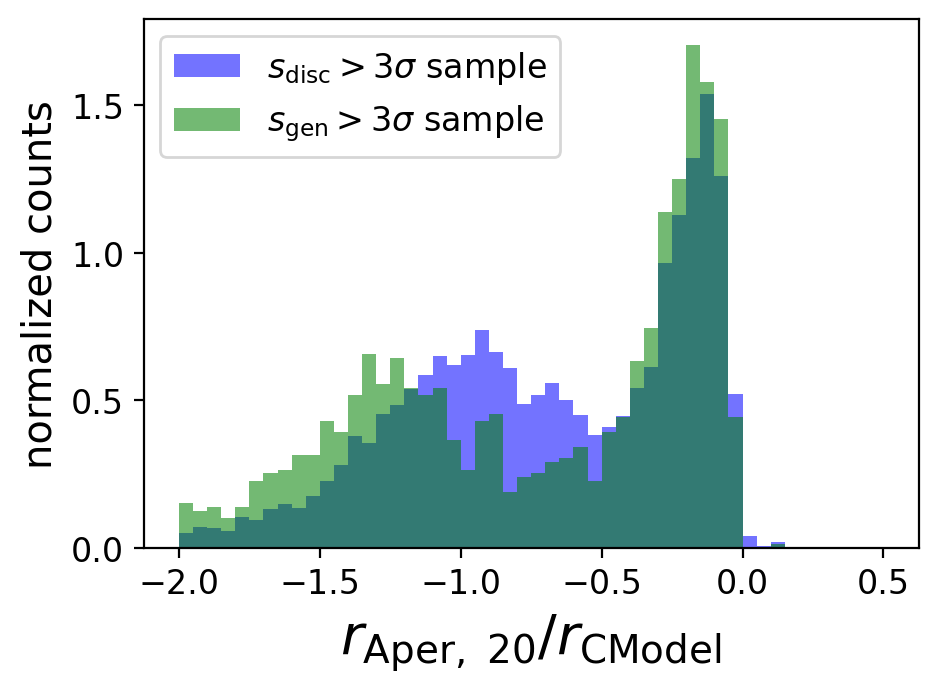

In [23]:
aper_ratio_d = np.log10(anom_disc['r_convolvedflux_3_20_flux'] / anom_disc['r_cmodel_flux'])
aper_ratio_g = np.log10(anom_gen['r_convolvedflux_3_20_flux'] / anom_gen['r_cmodel_flux'])

_ = plt.hist(aper_ratio_d, bins=50, density=True, range=(-2, 0.5), color=cd, label=ld, alpha=alpha)
_ = plt.hist(aper_ratio_g, bins=50, density=True, range=(-2, 0.5), color=cg, label=lg, alpha=alpha)

_ = plt.xlabel(r'$r_{\rm Aper,\ 20}/r_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

<ipython-input-24-22296501de58>:1: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_d_dg = np.log10(anom_disc_dg['r_convolvedflux_3_20_flux'] / anom_disc_dg['r_cmodel_flux'])
<ipython-input-24-22296501de58>:1: RuntimeWarning: invalid value encountered in log10
  aper_ratio_d_dg = np.log10(anom_disc_dg['r_convolvedflux_3_20_flux'] / anom_disc_dg['r_cmodel_flux'])
<ipython-input-24-22296501de58>:2: RuntimeWarning: invalid value encountered in log10
  aper_ratio_d_gd = np.log10(anom_disc_gd['r_convolvedflux_3_20_flux'] / anom_disc_gd['r_cmodel_flux'])
<ipython-input-24-22296501de58>:3: RuntimeWarning: divide by zero encountered in true_divide
  aper_ratio_g_dg = np.log10(anom_gen_dg['r_convolvedflux_3_20_flux'] / anom_gen_dg['r_cmodel_flux'])
<ipython-input-24-22296501de58>:3: RuntimeWarning: invalid value encountered in log10
  aper_ratio_g_dg = np.log10(anom_gen_dg['r_convolvedflux_3_20_flux'] / anom_gen_dg['r_cmodel_flux'])
<ipython-input-24-22296501de58>:4: Runti

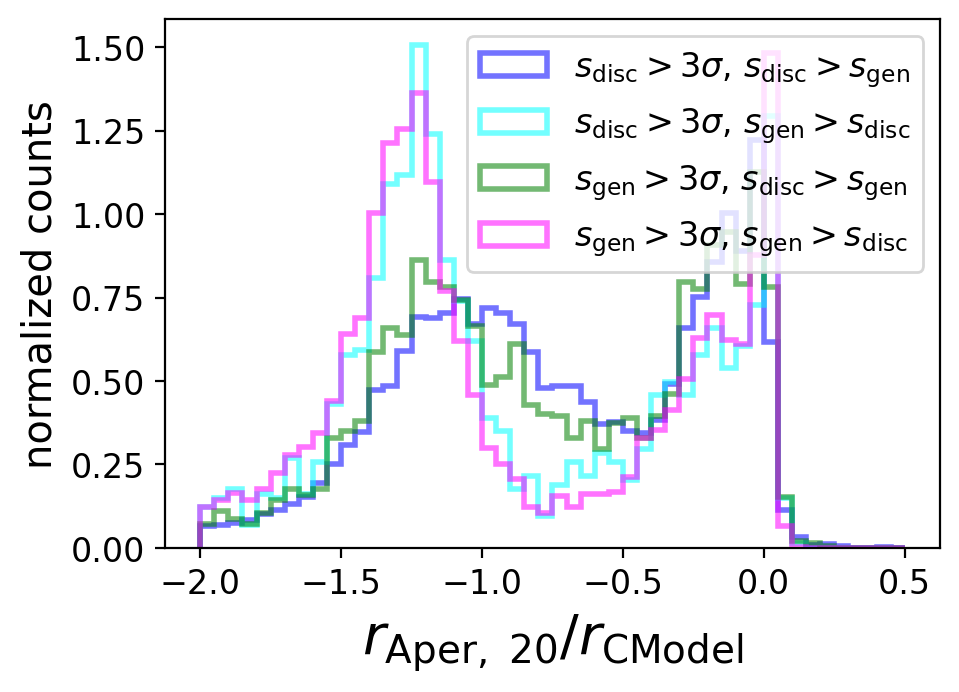

In [24]:
aper_ratio_d_dg = np.log10(anom_disc_dg['r_convolvedflux_3_20_flux'] / anom_disc_dg['r_cmodel_flux'])
aper_ratio_d_gd = np.log10(anom_disc_gd['r_convolvedflux_3_20_flux'] / anom_disc_gd['r_cmodel_flux'])
aper_ratio_g_dg = np.log10(anom_gen_dg['r_convolvedflux_3_20_flux'] / anom_gen_dg['r_cmodel_flux'])
aper_ratio_g_gd = np.log10(anom_gen_gd['r_convolvedflux_3_20_flux'] / anom_gen_gd['r_cmodel_flux'])

histtype='step'
lw=2
_ = plt.hist(aper_ratio_d_dg, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color=cd, label=ld_dg, alpha=alpha)
_ = plt.hist(aper_ratio_d_gd, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color='cyan', label=ld_gd, alpha=alpha)
_ = plt.hist(aper_ratio_g_dg, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color=cg, label=lg_dg, alpha=alpha)
_ = plt.hist(aper_ratio_g_gd, lw=lw, histtype=histtype, bins=50, density=True, range=(-2, 0.5), color='magenta', label=lg_gd, alpha=alpha)

_ = plt.xlabel(r'$r_{\rm Aper,\ 20}/r_{\rm CModel}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

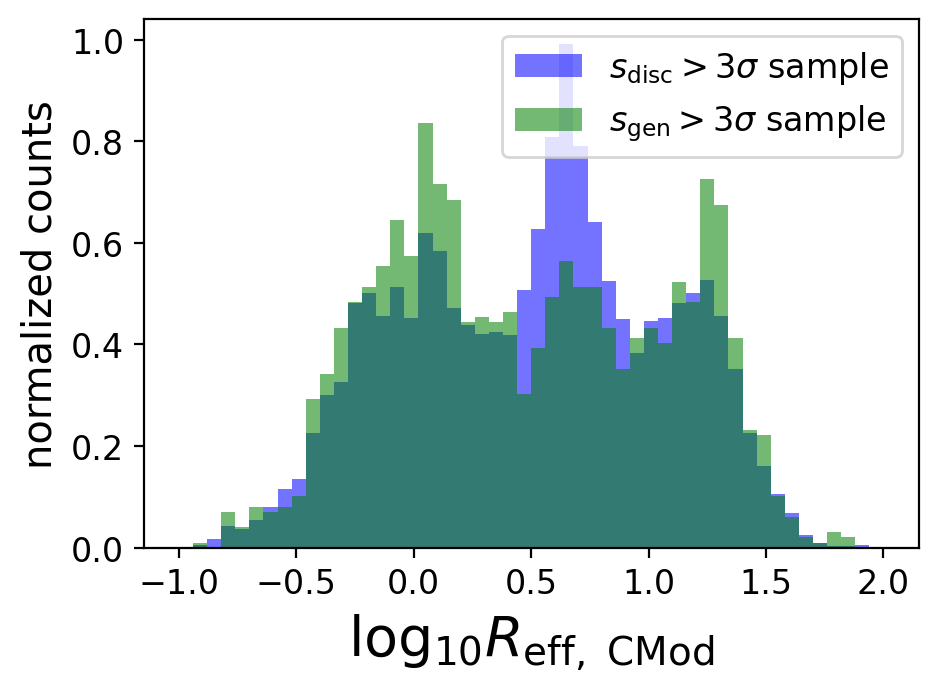

In [25]:
logr_disc = np.log10(anom_disc['i_cmodel_ellipse_r'])
logr_gen = np.log10(anom_gen['i_cmodel_ellipse_r'])

myrange = (-1, 2)
_ = plt.hist(logr_disc, bins=50, density=True, range=myrange, color=cd, label=ld, alpha=alpha)
_ = plt.hist(logr_gen, bins=50, density=True, range=myrange, color=cg, label=lg, alpha=alpha)
_ = plt.xlabel(r'$\log_{10} R_{\rm eff,\ CMod}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()

There are still differences but they are less prominent.

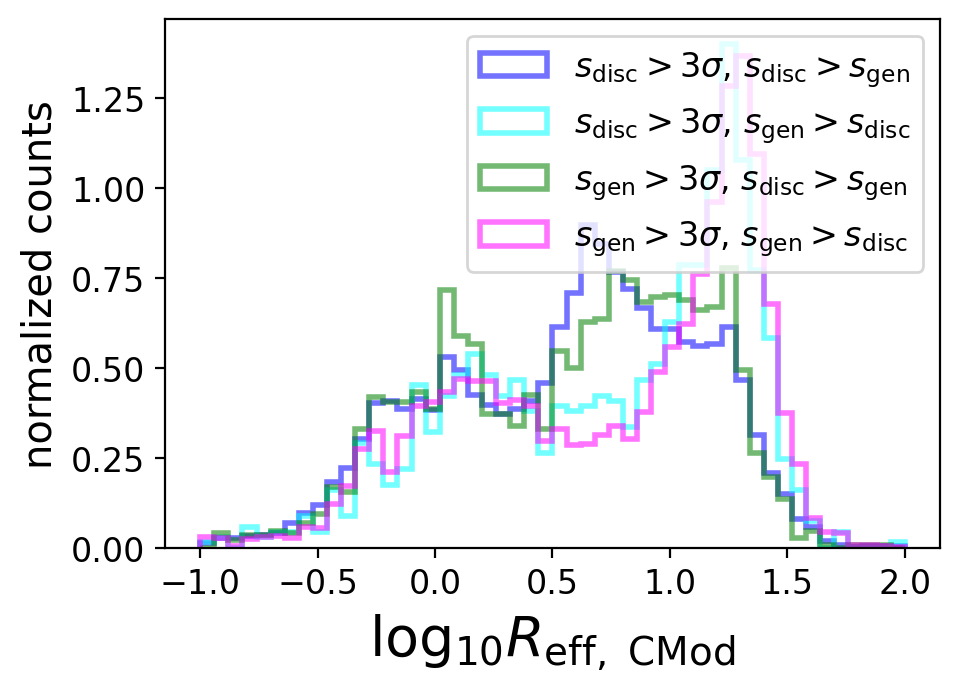

In [26]:
logr_d_dg = np.log10(anom_disc_dg['i_cmodel_ellipse_r'])
logr_d_gd = np.log10(anom_disc_gd['i_cmodel_ellipse_r'])
logr_g_dg = np.log10(anom_gen_dg['i_cmodel_ellipse_r'])
logr_g_gd = np.log10(anom_gen_gd['i_cmodel_ellipse_r'])

myrange = (-1, 2)
histtype='step'
lw=2
_ = plt.hist(logr_d_dg, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color=cd, label=ld_dg, alpha=alpha)
_ = plt.hist(logr_d_gd, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color='cyan', label=ld_gd, alpha=alpha)
_ = plt.hist(logr_g_dg, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color=cg, label=lg_dg, alpha=alpha)
_ = plt.hist(logr_g_gd, lw=lw, histtype=histtype, bins=50, density=True, range=myrange, color='magenta', label=lg_gd, alpha=alpha)


_ = plt.xlabel(r'$\log_{10} R_{\rm eff,\ CMod}$', fontsize=20)
plt.ylabel('normalized counts')
plt.legend()